# 1. Introduction

In Seoul, there are many Baskin Robins stores and Donkin Donuts sotres.  
And it seems to be gathered together.  
Here I'll do location analysis of those franchise stores.  
Then we can have a insight of store location and we can find the best location for your new store.

# 2. Data

I download the dataset from the Public data portal.  
(https://www.data.go.kr/dataset/15012005/fileData.do)

# 3. Methodology

### Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import folium
from folium.plugins import HeatMap

import warnings
warnings.filterwarnings('ignore')

# Korean Font setting
plt.rc("font", family="Malgun Gothic")

%matplotlib inline

### Dataset

In [2]:
df = pd.read_csv("data/상가업소정보_201912_01.csv", sep='|')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [3]:
df.shape

(573680, 39)

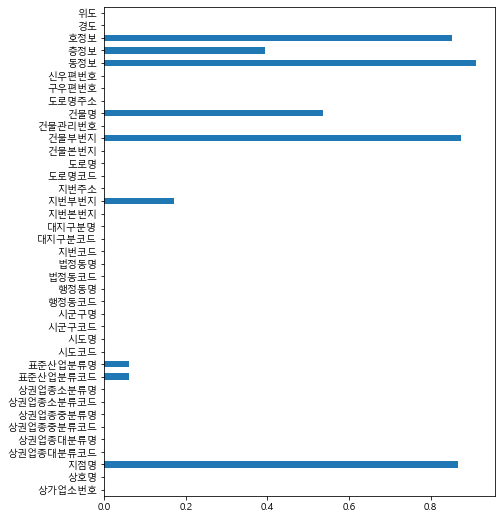

In [4]:
df.isnull().mean().plot.barh(figsize=(7, 9))

In [5]:
columns = ['상호명', '상권업종대분류명', '상권업종중분류명', '상권업종소분류명', 
           '시도명', '시군구명', '행정동명', '법정동명', '도로명주소', 
           '경도', '위도']
print(df.shape)
df = df[columns].copy()
df.shape

(573680, 39)


(573680, 11)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


### Seoul dataset

In [7]:
df_seoul = df[df["시도명"] == "서울특별시"].copy()
print(df_seoul.shape)
df_seoul.head()

(407376, 11)


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


In [8]:
df_seoul["시군구명"].nunique()

25

### Analysis Locations : Baskin Robbins & Dunkin Donuts

In [9]:
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()
df_seoul["상호명_소문자"].str.extract("(베|배)스킨라빈스|baskinrobbins")[0].value_counts()

배    347
베    117
Name: 0, dtype: int64

In [10]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), 
             "상호명_소문자"].shape

(466,)

In [11]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("던킨|dunkin"), "상호명_소문자"].shape

(191,)

In [12]:
df_31 = df_seoul[df_seoul["상호명_소문자"].str.contains(
    '배스킨라빈스|베스킨라빈스|baskinrobbins|던킨|dunkin')].copy()
df_31.shape

(657, 12)

In [13]:
df_31.loc[df_31["상호명_소문자"].str.contains("배스킨라빈스|베스킨라빈스|baskinrobbins"), 
          "브랜드명"] = "배스킨라빈스"
df_31[["상호명", "브랜드명"]].head()

,상호명,브랜드명
76,배스킨라빈스,배스킨라빈스
1167,던킨도너츠,NaN
1819,던킨도너츠테크노마트점,NaN
2164,베스킨라빈스,배스킨라빈스
2305,던킨도너츠창동하나로,NaN


In [14]:
df_31["브랜드명"] = df_31["브랜드명"].fillna("던킨도너츠")
df_31["브랜드명"]

76        배스킨라빈스
1167       던킨도너츠
1819       던킨도너츠
2164      배스킨라빈스
2305       던킨도너츠
           ...  
558894     던킨도너츠
560984     던킨도너츠
561929    배스킨라빈스
561930    배스킨라빈스
569825     던킨도너츠
Name: 브랜드명, Length: 657, dtype: object

In [15]:
df_31["상권업종대분류명"].value_counts()

음식       655
소매         1
생활서비스      1
Name: 상권업종대분류명, dtype: int64

In [16]:
df_31[df_31["상권업종대분류명"].isin(["소매", "생활서비스"])]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자,브랜드명
358699,배스킨라빈스,소매,종합소매점,할인점,서울특별시,강남구,압구정동,신사동,서울특별시 강남구 압구정로 204,127.029381,37.527375,배스킨라빈스,배스킨라빈스
556592,baskinrobbins,생활서비스,광고/인쇄,인쇄종합,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 396,127.028289,37.498154,baskinrobbins,배스킨라빈스


In [17]:
df_31 = df_31[~df_31["상권업종대분류명"].isin(["소매", "생활서비스"])].copy()
df_31.shape

(655, 13)

In [18]:
brand_count = df_31["브랜드명"].value_counts()
brand_count

배스킨라빈스    464
던킨도너츠     191
Name: 브랜드명, dtype: int64

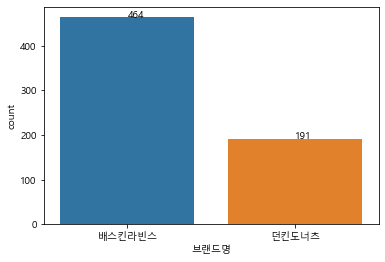

In [19]:
g = sns.countplot(data=df_31, x="브랜드명")

for i, val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i], s=brand_count[i])

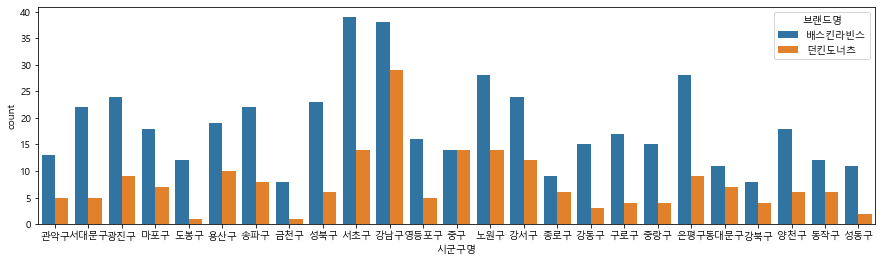

In [20]:
plt.figure(figsize=(15, 4))
g = sns.countplot(data=df_31, x="시군구명", hue="브랜드명")

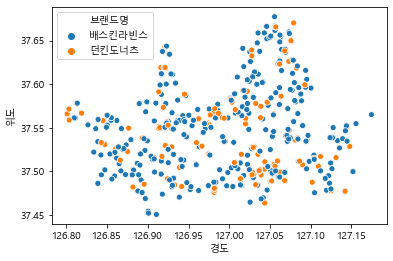

In [21]:
sns.scatterplot(data=df_31, x="경도", y="위도", hue="브랜드명")

In [22]:
lat = df_31["위도"].mean()
long = df_31["경도"].mean()
lat, long

(37.548567678569114, 126.99419527148807)

In [23]:
# Test

m = folium.Map([lat, long])
# 127.039032	37.495593
folium.Marker(
    [37.495593, 127.039032], 
    popup='<i>던킨도너츠</i>', 
    tooltip="던킨도너츠").add_to(m)
m.save('index.html')
m

# 4. Results

In [24]:
# icon=folium.Icon(color=icon_color) 로 아이콘 컬러를 변경합니다.
m = folium.Map([lat, long], zoom_start=12, tiles="stamen toner")

for i in df_31.index:
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "green"

    folium.CircleMarker(
        [sub_lat,sub_long ], 
        radius=3,
        color=icon_color,
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(m)
m

In [26]:
# HeatMap 

heat = df_31[["위도", "경도", "브랜드명"]].copy()
heat["브랜드명"] = heat["브랜드명"].replace("배스킨라빈스", 1).replace("던킨도너츠", 1)
heat = heat.values

In [27]:
heat[:5]

array([[ 37.47959928, 126.95216562,   1.        ],
       [ 37.55926336, 126.94536912,   1.        ],
       [ 37.53571341, 127.09568067,   1.        ],
       [ 37.55210376, 126.92380859,   1.        ],
       [ 37.65510084, 127.05081759,   1.        ]])

In [28]:
m = folium.Map([lat, long], tiles='stamentoner', zoom_start=12)


for i in df_31.index:
    sub_lat = df_31.loc[i, "위도"]
    sub_long = df_31.loc[i, "경도"]
    
    title = df_31.loc[i, "상호명"] + " - " + df_31.loc[i, "도로명주소"]
    
    icon_color = "blue"
    if df_31.loc[i, "브랜드명"] == "던킨도너츠":
        icon_color = "green"

    folium.CircleMarker(
        [sub_lat,sub_long ], 
        radius=3,
        color=icon_color,
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(m)
    
HeatMap(heat).add_to(m)
m

# 5. Discussion

I analyzed the public data released by the government.  
Now we can see where the dense store locations.

# 6. Conclusion

Now we can find new franchise store location, that is Baskin Robins & Dunkin Donuts, in Seoul.